## Assess pseudotime for Guo et al data.
## we use linear separability of 32 ICM-TE
## and 32 ICM to 64 PE and EPI

In [1]:
# see http://tonysyu.github.io/pypath-magic.html#.V_pr8DtWKf4
%load_ext pypath_magic
%cd ..
%pwd
%pypath -a
%pypath -l

/Users/mqbssaby/pythonprojects/BranchedGP


UsageError: '/Users/mqbssaby/pythonprojects/BranchedGP' is already in the user path.

In [16]:
import guoCommon
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
pt, Y, Ygene, labels, labelLegend, stageCell, stageN = guoCommon.LoadMouseQPCRData()

Loaded GPLVM data/guo_ssData.p with nrowsXncols = (437, 2).
LoadMouseQPCRData output


# Ygene direction
1. How linearly separable are 32ICM and 32TE in Ygene direction?
1. How seperable are the 64 EPI, PE sub-branch?

# PT direction
1. How linearly separable are the 7 stages in the pseudotime direction?

# Smoothness?
1. How rough it the branched GP fit?

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score
def LinSeperability(X, strLabels):
    lin_clf = svm.LinearSVC()
    lin_clf.fit(X, strLabels) 
    predClass=lin_clf.predict(X)
    a=accuracy_score(strLabels, predClass)
    return a

In [32]:
# this assesses how good a gene is at linearly discriminating branch points
linSep = pd.DataFrame(np.zeros((Ygene.columns.size, 2)), index=Ygene.columns)

for ig, g in enumerate(Ygene):
    gd = Ygene[g]
    idx = np.logical_or(labels == '32 ICM', labels == '32 TE')
    assert np.unique(labels[idx]).size == 2  # just double check
    linSep.iloc[ig, 0] = LinSeperability(gd[idx].values[:,None], labels[idx].values) # 32 ell stage branch
    idx = np.logical_or(labels == '64 EPI', labels == '64 PE')
    assert np.unique(labels[idx]).size == 2  # just double check
    linSep.iloc[ig, 1] = LinSeperability(gd[idx].values[:,None], labels[idx].values) # 64 cell stage ICM branch
linSep.sort_values(ascending=False, axis=0, inplace=True, by=[0, 1])
print(linSep)

                0         1
Pdgfra   0.926606  0.984127
Gata3    0.926606  0.698413
Pecam1   0.917431  0.936508
Id2      0.917431  0.698413
Tspan8   0.908257  0.714286
Dab2     0.899083  0.793651
Ahcy     0.899083  0.761905
Cdx2     0.899083  0.698413
Fn1      0.889908  0.936508
Utf1     0.889908  0.825397
Atp12a   0.889908  0.682540
Sox2     0.880734  0.984127
Krt8     0.880734  0.698413
DppaI    0.880734  0.682540
Snail    0.844037  0.793651
Esrrb    0.834862  0.904762
Tcfap2a  0.825688  0.698413
Aqp3     0.807339  0.920635
Tcf23    0.807339  0.809524
Klf2     0.788991  0.984127
Bmp4     0.788991  0.841270
Fgf4     0.770642  0.984127
Gata6    0.770642  0.984127
Creb312  0.770642  0.904762
Pdgfa    0.761468  0.777778
Mbnl3    0.761468  0.698413
Nanog    0.752294  1.000000
Klf4     0.752294  0.888889
Hnf4a    0.752294  0.698413
Runx1    0.743119  0.968254
Pou5f1   0.743119  0.698413
Fgfr2    0.733945  0.952381
Sox17    0.733945  0.746032
Grhl2    0.733945  0.698413
Gata4    0.724771  0

In [19]:
# This asseses how good the pseudotime rank correlates with capture time
print('Pseudotime rank correlation', scipy.stats.spearmanr(pt, stageN)) # pt rank correlation

Pseudotime rank correlation SpearmanrResult(correlation=0.9315303321738746, pvalue=3.2926372839376035e-193)


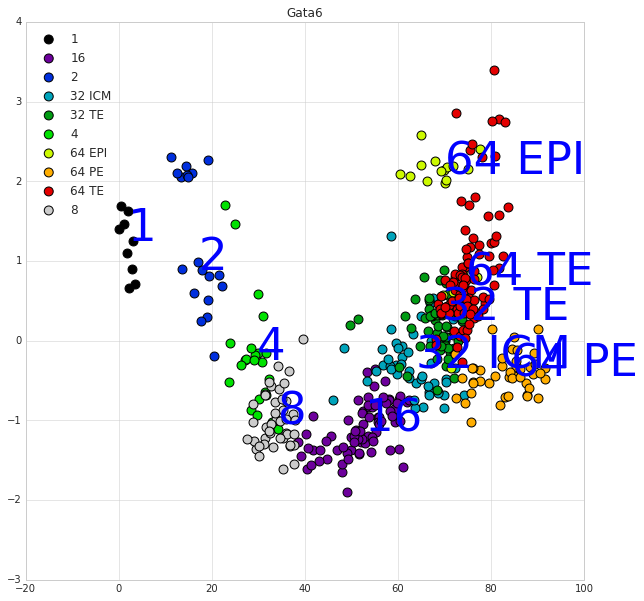

In [38]:
strGene = 'Gata6'
guoCommon.plotGene(pt, Ygene[strGene].values, labels)
plt.title(strGene)

In [36]:
Ygene.shape

(437, 48)